## Assignment 6
### Lab 2/3 for Elective Lab ODE's and FFT's
Katie Robinson

[Problem Experiment](#prob_experiment) 

Lorenz’ results are based on the following values of the physical parameters taken from Saltzman’s paper (Saltzman, 1962): $$\sigma=10 \quad \mathrm{and} \quad b=\frac{8}{3}.$$ 
As you will see in [Section stability](#sec_stability), there is a *critical value of the parameter $\rho$*, $\rho^\ast=470/19\approx 24.74$ (for these values of $\sigma$ and $\beta$); it is *critical* in the sense that for
any value of $\rho>\rho^\ast$, the flow is unstable.

To allow you to investigate the behaviour of the solution to the Lorenz
equations, you can try out various parameter values in the following
interactive example. *Initially, leave $\sigma$ and $\beta$ alone, and
modify only $\rho$ and the initial conditions.* If you have time,
you can try varying the other two parameters, and see what happens. Here
are some suggestions:

-   Fix the initial conditions at $(5,5,5)$ and vary $\rho$ between $0$ and
    $100$.

-   Fix $\rho=28$, and vary the initial conditions; for example, try
    $(0,0,0)$, $(0.1,0.1,0.1)$, $(0,0,20)$, $(100,100,100)$,
    $(8.5,8.5,27)$, etc.

-   Anything else you can think of …

1.  Describe the different types of behaviour you see and compare them
    to what you saw in [Figure fixed-plot](#fig_fixed-plot). Also, discuss the
    results in terms of what you read in [Section Introduction](#sec_introduction)
    regarding the four properties of the solution.

2.  One question you should be sure to ask yourself is: *Does
    changing the initial condition affect where the solution ends
    up?* The answer to this question will indicate whether there
    really is an attractor which solutions approach as
    $t\rightarrow\infty$.

3.  Finally, for the different types of solution behaviour, can you
    interpret the results physically in terms of the thermal convection
    problem?




In [3]:
# copying the integrator class for the Lorenz equations: (from lab 6)
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np




class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f

In [69]:
# copying the plotting function from lab6
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

def plot_3d(ax,xvals,vals,zvals,color):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,color)
    ax.set_xlim((-20, 20))
    ax.set_ylim((-30, 30))
    ax.set_zlim((5, 55))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

#### Test #1: Fixing the initial conditions at $(5,5,5)$ and varing $\rho$ between $0$ and $100$.

I will run the code 100 times for different values of $\rho$ between $0$ and $100$ and plot the final position of the solution at t$_{end}$.

In [37]:
# run the code 100 times for rho = 0 to 100. Save the x,y,z coordinates of the solution at
# t_end in a list.
timevars=dict(tstart=0,tend=27,dt=0.01)
initvars=dict(x=5,y=5,z=5)
x_final = []
y_final = []
z_final = []
pvals = []
for p in range(0,101):
    uservars=dict(sigma=10,beta=2.6666,rho=p)
    params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
    theSolver = Integ61('lorenz.yaml',**params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
    pvals.append(p)
    x_final.append(xvals[-1])
    y_final.append(yvals[-1])
    z_final.append(zvals[-1])
    

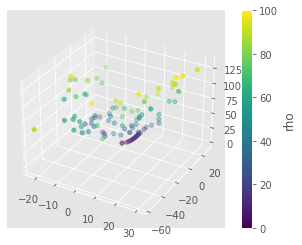

In [60]:
fig = plt.figure()
plt.rcParams['axes.grid'] = False
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(x_final, y_final, z_final, cmap=plt.cm.viridis, c=pvals) 
fig.colorbar(cax,label='rho')

In the plot above, I tested how to final solution changes when $\rho$ is varied between 0 and 100. The colorbar on the right represents the value of $\rho$ for each point on the scatter plot. As you can see, the position of the solution at t$_{end}$ is highly variable depending on the initial condition for $\rho$, even when the initial coordinates (x,yz) are fixed.

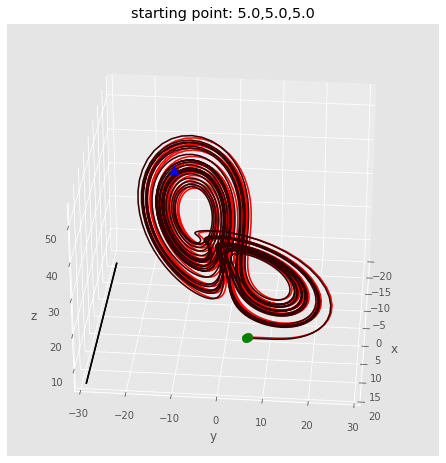

In [72]:
# override the parameters in lorenz.yaml
timevars=dict(tstart=0,tend=27,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=28)
initvars=dict(x=5,y=5,z=5)
params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
#
# expand the params dictionary into key,value pairs for
# the Integ61 constructor using dictionary expansion
#
theSolver = Integ61('lorenz.yaml',**params)
timevals, coords, errorlist = theSolver.timeloop5fixed()
xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]


fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax=plot_3d(ax,xvals,yvals,zvals,'r-')
ax=plot_3d(ax,xvals+5,yvals+5,zvals+5,'k')
out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
#help(ax.view_init)